In [2]:
# Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
# Regressão Logística
# Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


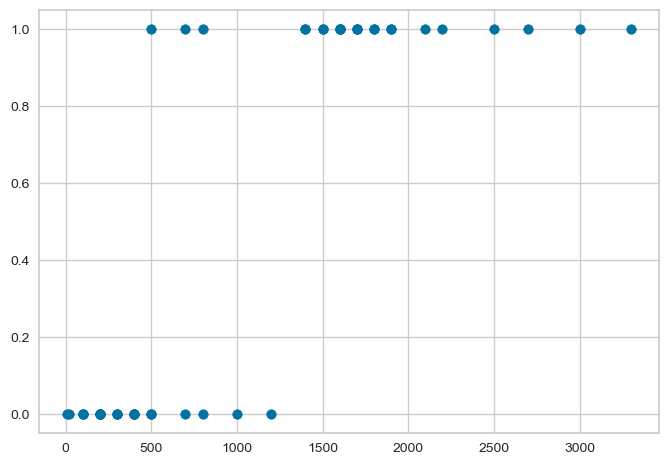

In [3]:
# Carregamento da base de dados, visualização de gráfico com os pontos e visualização de estatísticas
base = pd.read_csv('Eleicao.csv', sep = ';')
plt.scatter(base.DESPESAS, base.SITUACAO)
base.describe()

In [4]:
# Visualização do coeficiente de correlação entre o atributo \"despesas\" e \"situação\"
np.corrcoef(base.DESPESAS, base.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [5]:
# Criação das variávies X e y (variável independente e variável dependente)
# Transformação de X para o formato de matriz adicionando um novo eixo (newaxis)
X = base.iloc[:, 2].values
X = X[:, np.newaxis]
y = base.iloc[:, 1].values

In [6]:
# Criação do modelo, treinamento e visualização dos coeficientes
modelo = LogisticRegression()
modelo.fit(X, y)
modelo.coef_
modelo.intercept_

array([-4.60287217])

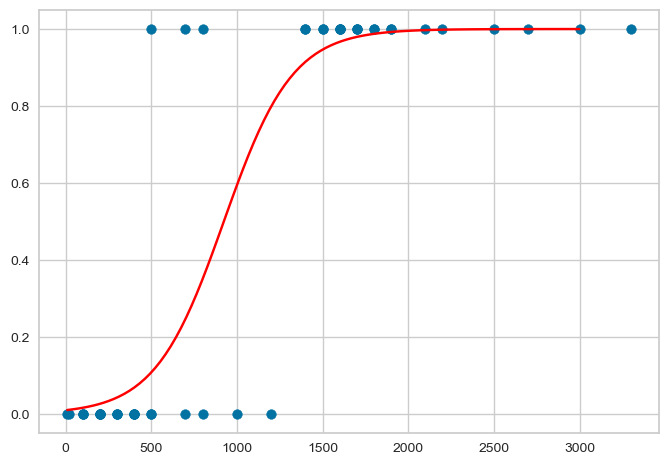

In [7]:
plt.scatter(X, y)
# Geração de novos dados para gerar a função sigmoide
X_teste = np.linspace(10, 3000, 100)
# Implementação da função sigmoide
def model(x):
    return 1 / (1 + np.exp(-x))
# Geração de previsões (variável r) e visualização dos resultados
r = model(X_teste * modelo.coef_ + modelo.intercept_).ravel()
plt.plot(X_teste, r, color = 'red')

In [12]:
# Carregamento da base de dados com os novos candidatos
base_previsoes = pd.read_csv('NovosCandidatos.csv', sep = ';')
# Mudança dos dados para formato de matriz
despesas = base_previsoes.iloc[:, 1].values
despesas = despesas.reshape(-1, 1)
# Previsões e geração de nova base de dados com os valores originais e as previsões
previsoes_teste = modelo.predict(despesas)
previsoes_teste

array([0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [13]:
base_previsoes = np.column_stack((base_previsoes, previsoes_teste))
base_previsoes

array([['A', 0, 0],
       ['B', 10, 0],
       ['C', 200, 0],
       ['D', 500, 0],
       ['E', 900, 0],
       ['F', 1500, 1],
       ['G', 3000, 1]], dtype=object)